Read the CSV file into a pandas dataframe

In [1]:
import pandas as pd
import numpy as np

bikes = pd.read_csv("https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD", na_filter = True)

In [2]:
type(bikes)

pandas.core.frame.DataFrame

In [3]:
bikes.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,03/31/2019 11:00:00 PM,6.0,10.0
1,03/31/2019 10:00:00 PM,7.0,14.0
2,03/31/2019 09:00:00 PM,18.0,15.0
3,03/31/2019 08:00:00 PM,26.0,31.0
4,03/31/2019 07:00:00 PM,30.0,58.0


Add the total (East + West) bicycle count

In [4]:
bikes['Total Bicycle Count'] = bikes['Fremont Bridge East Sidewalk']+bikes['Fremont Bridge West Sidewalk']
bikes.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total Bicycle Count
0,03/31/2019 11:00:00 PM,6.0,10.0,16.0
1,03/31/2019 10:00:00 PM,7.0,14.0,21.0
2,03/31/2019 09:00:00 PM,18.0,15.0,33.0
3,03/31/2019 08:00:00 PM,26.0,31.0,57.0
4,03/31/2019 07:00:00 PM,30.0,58.0,88.0


Add the hour of the day

In [5]:
Hours = pd.Series(index=range(len(bikes)))
for bike in range(0, len(bikes)):
    hour = int(bikes['Date'].iloc[bike][11:13])
    if bikes['Date'].iloc[bike][-2:] == 'PM':
        hour = hour + 12
    Hours[bike] = hour
bikes['Hour'] = Hours
bikes['Hour'] = bikes['Hour'].astype('int')
bikes.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total Bicycle Count,Hour
0,03/31/2019 11:00:00 PM,6.0,10.0,16.0,23
1,03/31/2019 10:00:00 PM,7.0,14.0,21.0,22
2,03/31/2019 09:00:00 PM,18.0,15.0,33.0,21
3,03/31/2019 08:00:00 PM,26.0,31.0,57.0,20
4,03/31/2019 07:00:00 PM,30.0,58.0,88.0,19


Add the year

In [6]:
Years = pd.Series(index=range(len(bikes)))
for bike in range(0, len(bikes)):
    year = int(bikes['Date'].iloc[bike][6:10])
    Years[bike] = year
bikes['Year'] = Years
bikes['Year'] = bikes['Year'].astype('int')
bikes.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total Bicycle Count,Hour,Year
0,03/31/2019 11:00:00 PM,6.0,10.0,16.0,23,2019
1,03/31/2019 10:00:00 PM,7.0,14.0,21.0,22,2019
2,03/31/2019 09:00:00 PM,18.0,15.0,33.0,21,2019
3,03/31/2019 08:00:00 PM,26.0,31.0,57.0,20,2019
4,03/31/2019 07:00:00 PM,30.0,58.0,88.0,19,2019


Create a dataframe with the subset of data from the year 2016

In [7]:
Year_2016 = bikes[bikes['Year'] == 2016]
Year_2016.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total Bicycle Count,Hour,Year
19680,12/31/2016 11:00:00 PM,4.0,4.0,8.0,23,2016
19681,12/31/2016 10:00:00 PM,7.0,8.0,15.0,22,2016
19682,12/31/2016 09:00:00 PM,4.0,6.0,10.0,21,2016
19683,12/31/2016 08:00:00 PM,3.0,6.0,9.0,20,2016
19684,12/31/2016 07:00:00 PM,6.0,4.0,10.0,19,2016


Use pandas + matplotlib to plot the counts by hour. (i.e. hour of the day on the x-axis, total daily counts on the y-axis) 

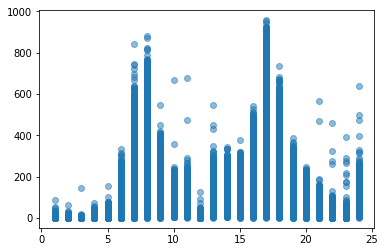

In [10]:
import matplotlib.pyplot as plt

plt.scatter(bikes['Hour'], bikes['Total Bicycle Count'], alpha=0.5)

Use pandas to determine what is (on average) the busiest hour of the day

In [9]:
bike_avgs = bikes[['Hour', 'Total Bicycle Count']].iloc[0:24,:]
for x in range(1,25):
    bike_avgs['Hour'].iloc[x-1] = x
    bike_avgs['Total Bicycle Count'].iloc[x-1] = bikes[bikes['Hour'] == x]['Total Bicycle Count'].mean()
bike_avgs[bike_avgs['Total Bicycle Count'] == bike_avgs['Total Bicycle Count'].max()]


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Hour,Total Bicycle Count
16,17,379.426824


Five o'clock is the busiest hour of the day